In [1]:
import pandas as pd
import numpy as np
import os
from src.__init__ import ROOT_DIR
import matplotlib.pyplot as plt

In [2]:
metrics_unet = pd.read_csv(os.path.join(ROOT_DIR, 'logs/cnn1d_50slide_xavier_6/metrics.csv'), index_col=['Appliance'])
metrics_cnn1d = pd.read_csv(os.path.join(ROOT_DIR, 'logs/unet_7lay_50slide_with_encoder/metrics.csv'), index_col=['Appliance'])


comp_table = metrics_cnn1d.join(metrics_unet, how='inner', lsuffix="(UNET)", rsuffix="(CNN1D)")
comp_table = comp_table.reindex(sorted(comp_table.columns), axis=1)
avg = np.average(comp_table.to_numpy(), axis=0)
avg_table = pd.DataFrame(avg.reshape(1,-1), columns=comp_table.keys(), index=['AVG'])
comp_table= comp_table.append(avg_table)

In [3]:
metrics_paper = pd.read_csv(os.path.join(ROOT_DIR, 'logs/paper.csv'), index_col=['Appliance'])
metrics_paper = metrics_paper.reindex(sorted(metrics_paper.columns), axis=1).rename_axis(None)

In [4]:
comp_table

,EAC(CNN1D),EAC(UNET),F1(CNN1D),F1(UNET),MAE(CNN1D),MAE(UNET),NDE(CNN1D),NDE(UNET)
washing_machine,0.801426,0.882215,0.930374,0.943700,13.816046,8.195056,0.151602,0.071262
dishwasher,0.829188,0.907923,0.822006,0.858006,14.275379,7.695221,0.159172,0.051244
kettle,0.787865,0.773779,0.914420,0.943128,9.735492,10.381933,0.171687,0.156246
fridge,0.909107,0.933943,0.948937,0.957895,6.818886,4.955684,0.096624,0.078902
microwave,0.682867,0.699524,0.778285,0.815851,7.555889,7.159031,0.370487,0.274331
AVG,0.802090,0.839477,0.878805,0.903716,10.440339,7.677385,0.189915,0.126397


In [5]:
metrics_paper

,EAC(CNN1D),EAC(UNET),F1(CNN1D),F1(UNET),MAE(CNN1D),MAE(UNET),NDE(CNN1D),NDE(UNET)
washing_machine,0.875,0.909,0.954,0.963,15.758,11.506,0.111,0.062
dishwasher,0.875,0.914,0.913,0.909,9.884,6.764,0.126,0.080
kettle,0.589,0.677,0.944,0.956,20.390,16.003,0.674,0.429
fridge,0.923,0.937,0.964,0.962,18.583,15.124,0.073,0.072
microwave,0.630,0.753,0.907,0.916,9.690,6.475,0.656,0.334
AVG,0.778,0.838,0.937,0.941,14.860,11.174,0.328,0.195


In [6]:
# comp_table.subtract(metrics_paper)
with open("comp_table.tex",'w') as fd:
    comp_table.to_latex(fd)



In [7]:
with open("paper_table.tex", 'w') as fd:
    metrics_paper.to_latex(fd)

In [8]:
# best_runs_path = os.path.join(ROOT_DIR, 'logs/best_runs')
#
# loss_df = pd.DataFrame()
# for i, csv in enumerate(os.listdir(best_runs_path)):
#     csv_path = os.path.join(best_runs_path, csv)
#     df = pd.read_csv(csv_path)
#
#     if 'unet' in csv:
#         if 'train' in csv:
#             id = 'unet_train'
#         else:
#             id = 'unet_val'
#     else:
#         if 'train' in csv:
#             id = '1dcnn_train'
#         else:
#             id = '1dcnn_val'
#
#     loss_df[id] = df['Value']
#
# fig, axs = plt.subplots(2, 1, figsize=(5.5,6))
# fig.tight_layout()
# axs[0].plot(loss_df['unet_train'])
# axs[0].plot(loss_df['1dcnn_train'])
# axs[0].set_title('Train Loss')
# axs[0].set_ylabel('Loss')
# axs[1].plot(loss_df['unet_val'])
# axs[1].plot(loss_df['1dcnn_val'])
# axs[1].set_title('Validation Loss')
# axs[1].set_ylabel('Loss')
# axs[1].set_xlabel('Epochs')
#
# lgd = fig.legend(['U-Net', '1DCNN'], loc='upper center', bbox_to_anchor=(0.5, 0.0001), ncol=3)
# path = os.path.join(ROOT_DIR, 'figures', 'loss_graphs')
# fig.savefig(path, bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
# plt.show()
# plt.close(fig)

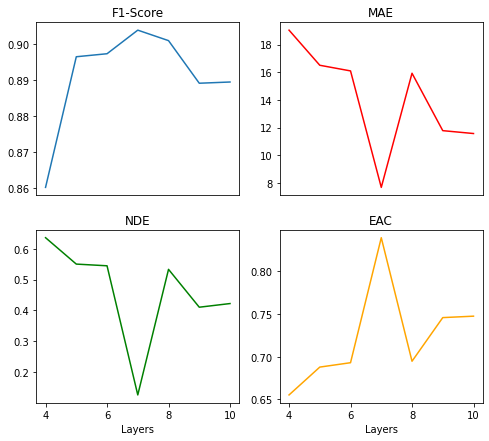

In [9]:
logs_path = os.path.join(ROOT_DIR, 'logs/')

layers_df = pd.DataFrame(columns=['F1','NDE','EAC','MAE'])
for i, csv in enumerate(os.listdir(logs_path)):
    if 'with_encoder' in csv:
        csv_path = os.path.join(logs_path, csv, 'metrics.csv')
        df = pd.read_csv(csv_path)
        df = df.drop(columns='Appliance')
        id = int(csv.split('_')[1][0])
        if id == 1:
            id = 10
        avg = np.average(df.to_numpy(), axis=0)
        avg_table = pd.DataFrame(avg.reshape(1,-1), columns=df.keys(), index=[id])
        layers_df = layers_df.append(avg_table)

layers_df = layers_df.sort_index()
fig, axs = plt.subplots(2, 2, figsize=(8,7))
axs[0,0].plot(layers_df['F1'])
axs[0,0].set_xticks([])
axs[0,0].set_title('F1-Score')
axs[0,1].plot(layers_df['MAE'], color='red')
axs[0,1].set_xticks([])
axs[0,1].set_title('MAE')
axs[1,0].plot(layers_df['NDE'], color='green')
axs[1,0].set_title('NDE')
axs[1,1].plot(layers_df['EAC'], color='orange')
axs[1,1].set_title('EAC')
axs[1,1].set_xlabel('Layers')
axs[1,0].set_xlabel('Layers')

#lgd = fig.legend(['F1','MAE','NDE','EAC'], loc='upper center', bbox_to_anchor=(0.5, 0.04), ncol=4)

path = os.path.join(ROOT_DIR, 'figures', 'layer_comp')
#fig.savefig(path, bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
fig.savefig(path, bbox_inches='tight', dpi=300)
plt.show()
plt.close(fig)

                                                                                            Appliances
Number of appliances                                                                                  
2apps                                                              Dell U2711, MacBook Pro 15 Mid-2014
3apps                                              Dell U2711, Lenovo X230 i7, MacBook Pro 15 Mid-2014
3apps_other                                           Dell U2711, Lenovo T420, MacBook Pro 15 Mid-2014
4apps                                 Dell U2711, Epson EB-65950, Lenovo T420, MacBook Pro 15 Mid-2014
5apps                 Dell U2711, Epson EB-65950, Lenovo T420, Lenovo X230 i7, MacBook Pro 15 Mid-2014


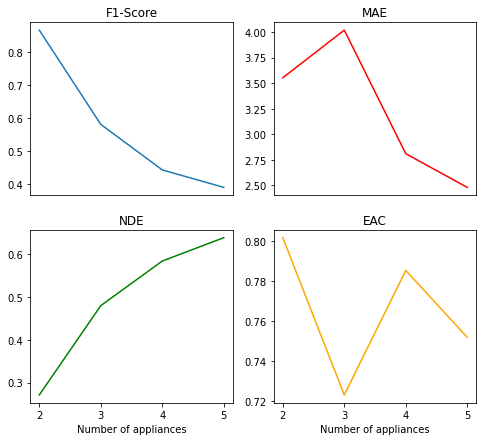

In [10]:
logs = list(filter(lambda x : 'apps' in x, os.listdir(os.path.join(ROOT_DIR, 'logs'))))
logs = sorted(logs)

metrics = sorted(["F1", "NDE", "EAC", "MAE"])
appliances_dict = {}
metrics_dict = {}
for l in logs:
    apps_metric_frame = None
    # find best run
    metrics_csv = list(
        map(lambda x : pd.read_csv(os.path.join(ROOT_DIR, 'logs', l, x, 'metrics.csv'), index_col=['Appliance']),
            filter(lambda x : '10lay' not in x, os.listdir(os.path.join(ROOT_DIR, 'logs',l))))
    )
    appliances_dict[l] = [", ".join(sorted(metrics_csv[0].index.tolist()))]

    sorted_metrics = list(map(lambda frame : frame.reindex(sorted(frame.columns), axis=1), metrics_csv))
    avg_metrics = list(map(lambda frame : frame.append(
        pd.DataFrame(
            frame.to_numpy().mean(axis=0).reshape(1,-1)
        , columns=frame.keys(), index=['AVG'])
    ), sorted_metrics))

    best = max(avg_metrics, key=lambda frame : frame.loc['AVG']['F1'])
    metrics_dict[l[0]] = best
    with open(f"{l}.tex", 'w') as fd:
        best.to_latex(fd)

pd.options.display.max_colwidth = 100
print(pd.DataFrame.from_dict(appliances_dict, orient='index').rename(columns={0:'Appliances'}).rename_axis('Number of appliances'))
with open("appliances.tex", 'w') as fd:
    pd.DataFrame.from_dict(appliances_dict, orient='index').rename(columns={0:'Appliances'}).rename_axis('Number of appliances').to_latex(fd)

apps_df = pd.DataFrame(columns=metrics)
for k,v in metrics_dict.items():
    apps_df = apps_df.append(v.loc['AVG'], ignore_index=True)
apps_df.index = pd.RangeIndex(start=2, stop=6, step=1)

fig, axs = plt.subplots(2, 2, figsize=(8,7))
axs[0,0].plot(apps_df['F1'])
axs[0,0].set_xticks([])
axs[0,0].set_title('F1-Score')
axs[0,1].plot(apps_df['MAE'], color='red')
axs[0,1].set_xticks([])
axs[0,1].set_title('MAE')
axs[1,0].plot(apps_df['NDE'], color='green')
axs[1,0].set_title('NDE')
axs[1,1].plot(apps_df['EAC'], color='orange')
axs[1,1].set_title('EAC')
axs[1,1].set_xlabel('Number of appliances')
axs[1,0].set_xlabel('Number of appliances')

fig.savefig(os.path.join(ROOT_DIR, 'figures', 'app_comp.png'), bbox_inches='tight', dpi=300)
plt.show()
plt.close(fig)

In [17]:
p = os.path.join(ROOT_DIR, 'logs', '5apps')
logs = sorted(list(os.listdir(p)))
ten_lay_logs = list(filter(lambda x : '10lay' in x, logs))
seven_lay_logs = list(
    set(logs) - set(ten_lay_logs)
)
def find_best(logdir):
    # find best run
    metrics_csv = list(
        map(lambda x : pd.read_csv(os.path.join(p, x, 'metrics.csv'), index_col=['Appliance']),
        logdir
            )
    )
    appliances_dict[l] = [", ".join(sorted(metrics_csv[0].index.tolist()))]

    sorted_metrics = list(map(lambda frame : frame.reindex(sorted(frame.columns), axis=1), metrics_csv))
    avg_metrics = list(map(lambda frame : frame.append(
        pd.DataFrame(
            frame.to_numpy().mean(axis=0).reshape(1,-1)
        , columns=frame.keys(), index=['AVG'])
    ), sorted_metrics))

    return max(avg_metrics, key=lambda frame : frame.loc['AVG']['F1'])
ten_lay_frame = find_best(ten_lay_logs)
seven_lay_frame = find_best(seven_lay_logs)

comp_table = seven_lay_frame.join(ten_lay_frame, how='inner', lsuffix="(7 layer)", rsuffix="(10 layer)")
comp_table = comp_table.reindex(sorted(comp_table.columns), axis=1)
with open("BLOND_layer_results.tex", "w") as fd:
    comp_table.to_latex(fd)

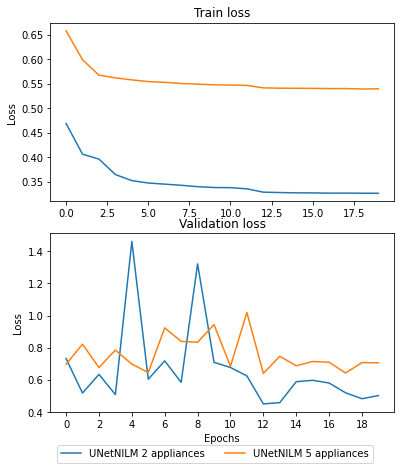

In [6]:
best_runs_path = os.path.join(ROOT_DIR, 'logs', '5apps_csv')

loss_df = pd.DataFrame()
for i, csv in enumerate(os.listdir(best_runs_path)):
    csv_path = os.path.join(best_runs_path, csv)
    df = pd.read_csv(csv_path)

    #id = 'train' if 'train' in csv else 'val'
    if '2apps' in csv:
        if 'train' in csv:
            id = '2apps_train'
        else:
            id = '2apps_val'
    else:
        if 'train' in csv:
            id = '5apps_train'
        else:
            id = '5apps_val'

    loss_df[id] = df['Value']

fig, axs = plt.subplots(2, 1, figsize=(5.5,6))
fig.tight_layout()
axs[0].plot(loss_df['2apps_train'])
axs[0].plot(loss_df['5apps_train'])
axs[0].set_title('Train loss')
axs[0].set_ylabel('Loss')

axs[1].plot(loss_df['2apps_val'])
axs[1].plot(loss_df['5apps_val'])
axs[1].set_title('Validation loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_xticks(np.arange(0,20,step=2))
lgd = fig.legend(['UNetNILM 2 appliances', 'UNetNILM 5 appliances'], loc='upper center', bbox_to_anchor=(0.5, 0.0001), ncol=3)
path = os.path.join(ROOT_DIR, 'figures', 'BLOND_loss_graphs')
fig.savefig(path, bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
plt.show()
plt.close(fig)

